In [1]:
#Import required package

import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn import cross_validation
import sklearn.metrics
import matplotlib.pyplot as plt
%matplotlib inline

C:\Users\sreekanth\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
loan=pd.read_csv("LoanStat.csv", low_memory=False) #load the csv file 

In [3]:
loan= loan.drop(['desc'],axis=1) #drop the 'desc' column

In [4]:
loan.shape #Identify number of rows and columns in table

(42538, 144)

In [5]:
#Remove the columns which are having null values more than 30% of total no. of rows

for i in loan.columns:
    nullfraction=loan[i].isnull().sum()/len(loan)
    if nullfraction>=0.3:
        loan.drop(i,axis=1,inplace=True)

In [6]:
loan.shape

(42538, 53)

In [7]:
#Print the columns having null values
for i in loan.columns:
    if loan[i].isnull().sum()>0:
        print("%s    :    %s    :    %s" %(i,loan[i].isnull().sum(),loan[i].dtypes))

loan_amnt    :    3    :    float64
funded_amnt    :    3    :    float64
funded_amnt_inv    :    3    :    float64
term    :    3    :    object
int_rate    :    3    :    object
installment    :    3    :    float64
grade    :    3    :    object
sub_grade    :    3    :    object
emp_title    :    2629    :    object
emp_length    :    1115    :    object
home_ownership    :    3    :    object
annual_inc    :    7    :    float64
verification_status    :    3    :    object
issue_d    :    3    :    object
loan_status    :    3    :    object
pymnt_plan    :    3    :    object
purpose    :    3    :    object
title    :    16    :    object
zip_code    :    3    :    object
addr_state    :    3    :    object
dti    :    3    :    float64
delinq_2yrs    :    32    :    float64
earliest_cr_line    :    32    :    object
inq_last_6mths    :    32    :    float64
open_acc    :    32    :    float64
pub_rec    :    32    :    float64
revol_bal    :    3    :    float64
revol_util    :

In [8]:
loan=loan.drop_duplicates(subset=list(loan),keep=False)#Drop the duplicate rows

In [9]:
loan.shape

(42535, 53)

In [10]:
#Drop the columns which are having only one value for all rows

orig_columns = loan.columns
drop_columns = []
for col in orig_columns:
    col_series = loan[col].dropna().unique()
    if len(col_series) == 1:
        drop_columns.append(col)
loan.drop(drop_columns, axis = 1,inplace=True)
drop_columns

['pymnt_plan',
 'initial_list_status',
 'out_prncp',
 'out_prncp_inv',
 'collections_12_mths_ex_med',
 'policy_code',
 'application_type',
 'chargeoff_within_12_mths',
 'hardship_flag',
 'disbursement_method']

In [11]:
loan.shape

(42535, 43)

In [12]:
#Print the rows which are having more than 40 null values

for i in range(len(loan)):
    if loan.iloc[i,:].isnull().sum()>=40:
        print("%s : %s"%(i,loan.iloc[i,:].isnull().sum()))

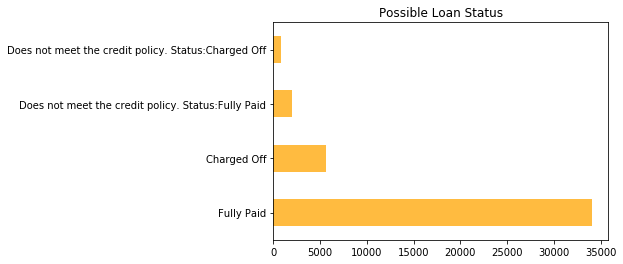

In [13]:
#Horizontal bar chart for 'loan_status'

loan['loan_status'].value_counts().plot(kind= 'barh', color = 'orange', title = 'Possible Loan Status', alpha = 0.75)

In [14]:
#New dataset with data of 'loan_status' in 'Fully Paid' or 'Charged Off'

data_loan = loan[(loan['loan_status'] == "Fully Paid") | (loan['loan_status'] == "Charged Off")]

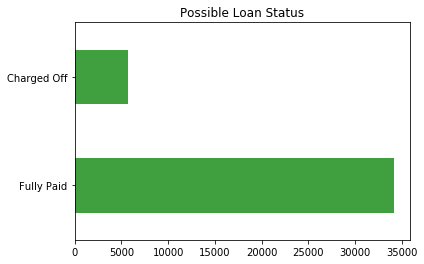

In [15]:
data_loan['loan_status'].value_counts().plot(kind= 'barh', color = 'green', title = 'Possible Loan Status', alpha = 0.75)

In [16]:
keep_list = ['addr_state', 'annual_inc','last_credit_pull_d', 'dti', 'earliest_cr_line',
             'emp_length', 'emp_title','grade', 'home_ownership', 'installment', 
             'int_rate', 'issue_d', 'loan_amnt', 'loan_status', 'open_acc','pub_rec','pub_rec_bankruptcies',
             'purpose', 'revol_bal', 'revol_util', 'sub_grade', 'term', 'title', 'total_acc', 
             'verification_status']

In [17]:
data_final = data_loan[keep_list]

In [18]:
#Prepare Keep_list with required columns

keep_list_final = ['addr_state', 'annual_inc','last_credit_pull_d', 'dti', 'earliest_cr_line',
             'emp_length', 'emp_title','grade', 'home_ownership', 'installment', 
             'int_rate', 'issue_d', 'loan_amnt', 'loan_status', 'open_acc','pub_rec','pub_rec_bankruptcies',
             'purpose', 'revol_bal', 'revol_util', 'sub_grade', 'term', 'title', 'total_acc', 
             'verification_status']

In [19]:
#New dataset with keep_list_final columns

data_final = data_loan[keep_list_final]

In [20]:
data_final.head()

,addr_state,annual_inc,last_credit_pull_d,dti,earliest_cr_line,emp_length,emp_title,grade,home_ownership,installment,...,pub_rec,pub_rec_bankruptcies,purpose,revol_bal,revol_util,sub_grade,term,title,total_acc,verification_status
0,AZ,24000.0,Aug-18,27.65,Jan-85,10+ years,NaN,B,RENT,162.87,...,0.0,0.0,credit_card,13648.0,83.70%,B2,36 months,Computer,9.0,Verified
1,GA,30000.0,Oct-16,1.00,Apr-99,< 1 year,Ryder,C,RENT,59.83,...,0.0,0.0,car,1687.0,9.40%,C4,60 months,bike,4.0,Source Verified
2,IL,12252.0,Jun-17,8.72,Nov-01,10+ years,NaN,C,RENT,84.33,...,0.0,0.0,small_business,2956.0,98.50%,C5,36 months,real estate business,10.0,Not Verified
3,CA,49200.0,Apr-16,20.00,Feb-96,10+ years,AIR RESOURCES BOARD,C,RENT,339.31,...,0.0,0.0,other,5598.0,21%,C1,36 months,personel,37.0,Source Verified
4,OR,80000.0,Apr-18,17.94,Jan-96,1 year,University Medical Group,B,RENT,67.79,...,0.0,0.0,other,27783.0,53.90%,B5,60 months,Personal,38.0,Source Verified


In [21]:
#Identify null values in each column
data_final.isnull().sum()

addr_state                 0
annual_inc                 0
last_credit_pull_d         2
dti                        0
earliest_cr_line           0
emp_length              1078
emp_title               2467
grade                      0
home_ownership             0
installment                0
int_rate                   0
issue_d                    0
loan_amnt                  0
loan_status                0
open_acc                   0
pub_rec                    0
pub_rec_bankruptcies     697
purpose                    0
revol_bal                  0
revol_util                50
sub_grade                  0
term                       0
title                     11
total_acc                  0
verification_status        0
dtype: int64

In [22]:
#Identify null values in each column
for i in data_final.columns:
    if data_final[i].isnull().sum()>0:
        print(i,":",data_final[i].isnull().sum()>0,":",data_final[i].dtypes)

last_credit_pull_d : True : object
emp_length : True : object
emp_title : True : object
pub_rec_bankruptcies : True : float64
revol_util : True : object
title : True : object


In [23]:
#Value count of column 'pub_rec_bankruptcies'
data_final['pub_rec_bankruptcies'].value_counts()

0.0    37404
1.0     1678
2.0        7
Name: pub_rec_bankruptcies, dtype: int64

In [24]:
#Remove the rows with null values in 'pub_rec_bankruptcies'

data_final1 = data_final[data_final.pub_rec_bankruptcies.notnull()]

In [25]:
data_final1.shape

(39089, 25)

In [26]:
#Drop columns not requied
data_final2 = data_final1.drop(["last_credit_pull_d", "earliest_cr_line", "addr_state", "title"], axis=1)
#Remove % symbol and change columns to float data type
data_final2["int_rate"] = data_final2["int_rate"].str.rstrip("%").astype("float")
data_final2["revol_util"] = data_final2["revol_util"].str.rstrip("%").astype("float")

In [27]:
data_final2.shape

(39089, 21)

In [28]:
data_final2.dtypes

annual_inc              float64
dti                     float64
emp_length               object
emp_title                object
grade                    object
home_ownership           object
installment             float64
int_rate                float64
issue_d                  object
loan_amnt               float64
loan_status              object
open_acc                float64
pub_rec                 float64
pub_rec_bankruptcies    float64
purpose                  object
revol_bal               float64
revol_util              float64
sub_grade                object
term                     object
total_acc               float64
verification_status      object
dtype: object

In [29]:
#Impute null values in numerical columns with mean values
data_final2.fillna(data_final2.mean(),inplace=True)

In [30]:
#Drop emp_title column 

data_final2 = data_final2.drop("emp_title", axis=1)

In [31]:
#Divide columns in to two lists categorical and numerical
numcol=[]
catcol=[]
for i in data_final2.columns:
    if data_final2[i].dtypes=='object':
        catcol.append(i)
    else:
        numcol.append(i)

In [33]:
data_final2[numcol].describe() #Describe the data

,annual_inc,dti,installment,int_rate,loan_amnt,open_acc,pub_rec,pub_rec_bankruptcies,revol_bal,revol_util,total_acc
count,3.908900e+04,39089.000000,39089.000000,39089.000000,39089.000000,39089.000000,39089.000000,39089.000000,39089.000000,39089.000000,39089.000000
mean,6.896899e+04,13.362003,324.777012,12.052617,11254.093863,9.292154,0.055591,0.043286,13387.158996,48.981628,22.141088
std,6.312507e+04,6.669952,208.909545,3.745604,7480.922349,4.382195,0.238542,0.204381,15849.039745,28.291798,11.396126
min,4.000000e+03,0.000000,16.080000,5.420000,500.000000,2.000000,0.000000,0.000000,0.000000,0.000000,2.000000
25%,4.080000e+04,8.230000,167.310000,9.250000,5500.000000,6.000000,0.000000,0.000000,3719.000000,25.600000,14.000000
50%,5.900000e+04,13.450000,280.410000,11.860000,10000.000000,9.000000,0.000000,0.000000,8869.000000,49.500000,20.000000
75%,8.250000e+04,18.630000,430.780000,14.610000,15000.000000,12.000000,0.000000,0.000000,17069.000000,72.500000,29.000000
max,6.000000e+06,29.990000,1305.190000,24.590000,35000.000000,44.000000,4.000000,2.000000,149588.000000,99.900000,90.000000


In [34]:
numcol.remove('pub_rec')

In [35]:
scaler=MinMaxScaler()

In [36]:
numcol_scaled= pd.DataFrame(scaler.fit_transform(data_final2[numcol]), columns=numcol)

In [37]:
catcol.pop(4)

'loan_status'

In [38]:
catcol

['emp_length',
 'grade',
 'home_ownership',
 'issue_d',
 'purpose',
 'sub_grade',
 'term',
 'verification_status']

In [39]:
data_final2.fillna('Others',inplace=True)

In [40]:
data_final2

,annual_inc,dti,emp_length,grade,home_ownership,installment,int_rate,issue_d,loan_amnt,loan_status,open_acc,pub_rec,pub_rec_bankruptcies,purpose,revol_bal,revol_util,sub_grade,term,total_acc,verification_status
0,24000.00,27.65,10+ years,B,RENT,162.87,10.65,Dec-11,5000.0,Fully Paid,3.0,0.0,0.0,credit_card,13648.0,83.70,B2,36 months,9.0,Verified
1,30000.00,1.00,< 1 year,C,RENT,59.83,15.27,Dec-11,2500.0,Charged Off,3.0,0.0,0.0,car,1687.0,9.40,C4,60 months,4.0,Source Verified
2,12252.00,8.72,10+ years,C,RENT,84.33,15.96,Dec-11,2400.0,Fully Paid,2.0,0.0,0.0,small_business,2956.0,98.50,C5,36 months,10.0,Not Verified
3,49200.00,20.00,10+ years,C,RENT,339.31,13.49,Dec-11,10000.0,Fully Paid,10.0,0.0,0.0,other,5598.0,21.00,C1,36 months,37.0,Source Verified
4,80000.00,17.94,1 year,B,RENT,67.79,12.69,Dec-11,3000.0,Fully Paid,15.0,0.0,0.0,other,27783.0,53.90,B5,60 months,38.0,Source Verified
5,36000.00,11.20,3 years,A,RENT,156.46,7.90,Dec-11,5000.0,Fully Paid,9.0,0.0,0.0,wedding,7963.0,28.30,A4,36 months,12.0,Source Verified
6,47004.00,23.51,8 years,C,RENT,170.08,15.96,Dec-11,7000.0,Fully Paid,7.0,0.0,0.0,debt_consolidation,17726.0,85.60,C5,60 months,11.0,Not Verified
7,48000.00,5.35,9 years,E,RENT,109.43,18.64,Dec-11,3000.0,Fully Paid,4.0,0.0,0.0,car,8221.0,87.50,E1,36 months,4.0,Source Verified
8,40000.00,5.55,4 years,F,OWN,152.39,21.28,Dec-11,5600.0,Charged Off,11.0,0.0,0.0,small_business,5210.0,32.60,F2,60 months,13.0,Source Verified
9,15000.00,18.08,< 1 year,B,RENT,121.45,12.69,Dec-11,5375.0,Charged Off,2.0,0.0,0.0,other,9279.0,36.50,B5,60 months,3.0,Verified


In [41]:
numcol_scaled.describe()

,annual_inc,dti,installment,int_rate,loan_amnt,open_acc,pub_rec_bankruptcies,revol_bal,revol_util,total_acc
count,39089.000000,39089.000000,39089.000000,39089.000000,39089.000000,39089.000000,39089.000000,39089.000000,39089.000000,39089.000000
mean,0.010835,0.445549,0.239465,0.345989,0.311713,0.173623,0.021643,0.089494,0.490307,0.228876
std,0.010528,0.222406,0.162057,0.195389,0.216838,0.104338,0.102190,0.105951,0.283201,0.129501
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.006137,0.274425,0.117313,0.199791,0.144928,0.095238,0.000000,0.024862,0.256256,0.136364
50%,0.009173,0.448483,0.205048,0.335942,0.275362,0.166667,0.000000,0.059290,0.495495,0.204545
75%,0.013092,0.621207,0.321695,0.479395,0.420290,0.238095,0.000000,0.114107,0.725726,0.306818
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [42]:
for i in data_final2.columns:
    print(i,":",len(data_final2[i].unique()),":",data_final2[i].dtypes)
    

annual_inc : 5260 : float64
dti : 2868 : float64
emp_length : 12 : object
grade : 7 : object
home_ownership : 4 : object
installment : 15015 : float64
int_rate : 337 : float64
issue_d : 52 : object
loan_amnt : 876 : float64
loan_status : 2 : object
open_acc : 38 : float64
pub_rec : 5 : float64
pub_rec_bankruptcies : 3 : float64
purpose : 14 : object
revol_bal : 21517 : float64
revol_util : 1090 : float64
sub_grade : 35 : object
term : 2 : object
total_acc : 82 : float64
verification_status : 3 : object


In [43]:
#Dummies for the two columns 'pub_rec' and 'pub_rec_bankruptcies'
col=['pub_rec','pub_rec_bankruptcies']
dummy_df1 = pd.get_dummies(data_final2[col])

In [44]:
# Prepare a cleaned loan dataset by concatenating numerical data and categorical data
status_replace = {
    "loan_status" : {
        "Fully Paid": 1,
        "Charged Off": 0,
    }
}
data_final2 = data_final2.replace(status_replace)

In [45]:
#Convert categorical columns to binary using dummies 
dummy_df = pd.get_dummies(data_final2[catcol])

In [46]:
#Concat categorical columns
catcol_df=pd.concat([dummy_df,dummy_df1,data_final2['loan_status']], axis=1, sort=False)

In [47]:
catcol_df

,emp_length_1 year,emp_length_10+ years,emp_length_2 years,emp_length_3 years,emp_length_4 years,emp_length_5 years,emp_length_6 years,emp_length_7 years,emp_length_8 years,emp_length_9 years,...,sub_grade_G4,sub_grade_G5,term_ 36 months,term_ 60 months,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,pub_rec,pub_rec_bankruptcies,loan_status
0,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0.0,0.0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0.0,0.0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0.0,0.0,1
3,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0.0,0.0,1
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0.0,0.0,1
5,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0.0,0.0,1
6,0,0,0,0,0,0,0,0,1,0,...,0,0,0,1,1,0,0,0.0,0.0,1
7,0,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,1,0,0.0,0.0,1
8,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,1,0,0.0,0.0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0.0,0.0,0


In [48]:
numcol_scaled

,annual_inc,dti,installment,int_rate,loan_amnt,open_acc,pub_rec_bankruptcies,revol_bal,revol_util,total_acc
0,0.003336,0.921974,0.113869,0.272822,0.130435,0.023810,0.0,0.091237,0.837838,0.079545
1,0.004336,0.033344,0.033938,0.513824,0.057971,0.023810,0.0,0.011278,0.094094,0.022727
2,0.001376,0.290764,0.052944,0.549817,0.055072,0.000000,0.0,0.019761,0.985986,0.090909
3,0.007538,0.666889,0.250739,0.420970,0.275362,0.190476,0.0,0.037423,0.210210,0.397727
4,0.012675,0.598199,0.040113,0.379238,0.072464,0.309524,0.0,0.185730,0.539540,0.409091
5,0.005337,0.373458,0.108897,0.129369,0.130435,0.166667,0.0,0.053233,0.283283,0.113636
6,0.007172,0.783928,0.119462,0.549817,0.188406,0.119048,0.0,0.118499,0.856857,0.102273
7,0.007338,0.178393,0.072414,0.689619,0.072464,0.047619,0.0,0.054958,0.875876,0.022727
8,0.006004,0.185062,0.105740,0.827334,0.147826,0.214286,0.0,0.034829,0.326326,0.125000
9,0.001835,0.602868,0.081739,0.379238,0.141304,0.000000,0.0,0.062030,0.365365,0.011364


In [49]:
col_names=numcol+list(catcol_df.columns)

In [50]:
col_names

['annual_inc',
 'dti',
 'installment',
 'int_rate',
 'loan_amnt',
 'open_acc',
 'pub_rec_bankruptcies',
 'revol_bal',
 'revol_util',
 'total_acc',
 'emp_length_1 year',
 'emp_length_10+ years',
 'emp_length_2 years',
 'emp_length_3 years',
 'emp_length_4 years',
 'emp_length_5 years',
 'emp_length_6 years',
 'emp_length_7 years',
 'emp_length_8 years',
 'emp_length_9 years',
 'emp_length_< 1 year',
 'emp_length_Others',
 'grade_A',
 'grade_B',
 'grade_C',
 'grade_D',
 'grade_E',
 'grade_F',
 'grade_G',
 'home_ownership_MORTGAGE',
 'home_ownership_OTHER',
 'home_ownership_OWN',
 'home_ownership_RENT',
 'issue_d_Apr-08',
 'issue_d_Apr-09',
 'issue_d_Apr-10',
 'issue_d_Apr-11',
 'issue_d_Aug-07',
 'issue_d_Aug-08',
 'issue_d_Aug-09',
 'issue_d_Aug-10',
 'issue_d_Aug-11',
 'issue_d_Dec-07',
 'issue_d_Dec-08',
 'issue_d_Dec-09',
 'issue_d_Dec-10',
 'issue_d_Dec-11',
 'issue_d_Feb-08',
 'issue_d_Feb-09',
 'issue_d_Feb-10',
 'issue_d_Feb-11',
 'issue_d_Jan-08',
 'issue_d_Jan-09',
 'issue_d_Ja

In [51]:
# Prepare a cleaned loan dataset by concatenating numerical data and categorical data
Final_df=pd.DataFrame(np.hstack([numcol_scaled,catcol_df]),columns=col_names)

In [52]:
Final_df

,annual_inc,dti,installment,int_rate,loan_amnt,open_acc,pub_rec_bankruptcies,revol_bal,revol_util,total_acc,...,sub_grade_G4,sub_grade_G5,term_ 36 months,term_ 60 months,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,pub_rec,pub_rec_bankruptcies,loan_status
0,0.003336,0.921974,0.113869,0.272822,0.130435,0.023810,0.0,0.091237,0.837838,0.079545,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,0.004336,0.033344,0.033938,0.513824,0.057971,0.023810,0.0,0.011278,0.094094,0.022727,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.001376,0.290764,0.052944,0.549817,0.055072,0.000000,0.0,0.019761,0.985986,0.090909,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,0.007538,0.666889,0.250739,0.420970,0.275362,0.190476,0.0,0.037423,0.210210,0.397727,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,0.012675,0.598199,0.040113,0.379238,0.072464,0.309524,0.0,0.185730,0.539540,0.409091,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
5,0.005337,0.373458,0.108897,0.129369,0.130435,0.166667,0.0,0.053233,0.283283,0.113636,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
6,0.007172,0.783928,0.119462,0.549817,0.188406,0.119048,0.0,0.118499,0.856857,0.102273,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
7,0.007338,0.178393,0.072414,0.689619,0.072464,0.047619,0.0,0.054958,0.875876,0.022727,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
8,0.006004,0.185062,0.105740,0.827334,0.147826,0.214286,0.0,0.034829,0.326326,0.125000,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
9,0.001835,0.602868,0.081739,0.379238,0.141304,0.000000,0.0,0.062030,0.365365,0.011364,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


In [53]:
#Divide Dataset in to two based on status
status0=Final_df.loc[Final_df['loan_status']==0]
status1=Final_df.loc[Final_df['loan_status']==1]

In [54]:
#Split data in to training and test datasets
from sklearn.cross_validation import train_test_split
a_train,a_test= train_test_split(status0, test_size=0.3,random_state=0)
b_train,b_test= train_test_split(status1, test_size=0.3,random_state=0)

In [55]:
#Prepare train and test datasets with features and labels seperated
train_y = pd.concat((a_train.loc[:,a_train.columns=='loan_status'],
                     b_train.loc[:,b_train.columns=='loan_status']),axis=0)
train_x = pd.concat((a_train.loc[:,a_train.columns!='loan_status'],
                    b_train.loc[:,b_train.columns!='loan_status']),axis=0)
test_y = pd.concat((a_test.loc[:,a_test.columns=='loan_status'],
                    b_test.loc[:,b_test.columns=='loan_status']),axis=0)
test_x = pd.concat((a_test.loc[:,a_test.columns!='loan_status'],
                    b_test.loc[:,b_test.columns!='loan_status']),axis=0)

In [56]:
#KNN Classifier model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
for i in range(1,30):
    knn = KNeighborsClassifier(n_neighbors=i)
    modelknn=knn.fit(train_x,train_y)
    predict=modelknn.predict(test_x)
    w=accuracy_score(predict,test_y)
    print("%s : %s" %(i,w))

C:\Users\sreekanth\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


1 : 0.7685027285129604
2 : 0.6927012278308322
3 : 0.822049795361528
4 : 0.7939972714870396
5 : 0.8395293315143247
6 : 0.8293826739427013
7 : 0.8483117326057299
8 : 0.8412346521145976
9 : 0.8505286493860846
10 : 0.8483117326057299
11 : 0.8546214188267395
12 : 0.8524897680763983
13 : 0.855218281036835
14 : 0.8542803547066848
15 : 0.8559004092769441
16 : 0.8545361527967258
17 : 0.8571793997271487


KeyboardInterrupt: 

In [ ]:
#Find the accuracy for k=21
knn = KNeighborsClassifier(n_neighbors=21)
modelknn=knn.fit(train_x,train_y)
predict=modelknn.predict(test_x)
w=accuracy_score(predict,test_y)
print("Accuracy for k=21 : %s" %(w))